<a href="https://colab.research.google.com/github/abdur-rakib-cse/Advanced-Eye-Disease-Classification-using-EfficientNet-and-MobileNetV3/blob/master/preprossing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python matplotlib


In [ ]:
!pip install opencv-python matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please enter the base folder path of your dataset: /content/drive/MyDrive/My Paper - Abdur Rakib 201-15-3651/Final EYE Disease Dataset 5 Classes
Please enter the base path to save the preprocessed data: /content/drive/MyDrive/My Paper - Abdur Rakib 201-15-3651/demo-pic-test
Do you want to display preprocessing steps for each image? (yes/no): yes


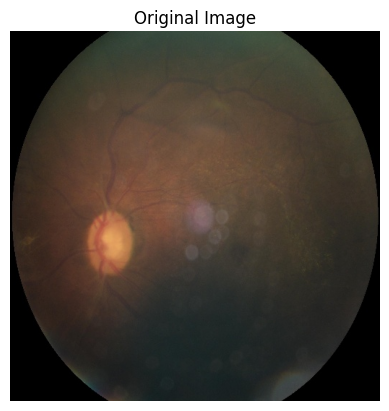

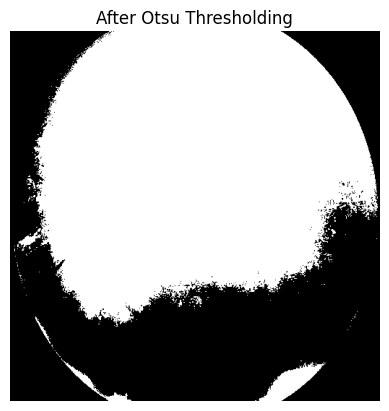

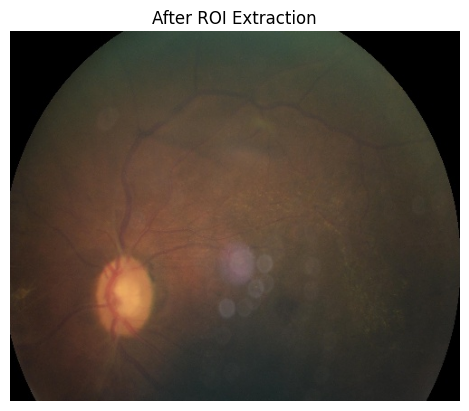

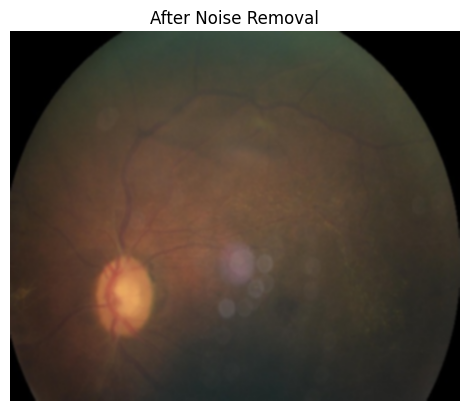

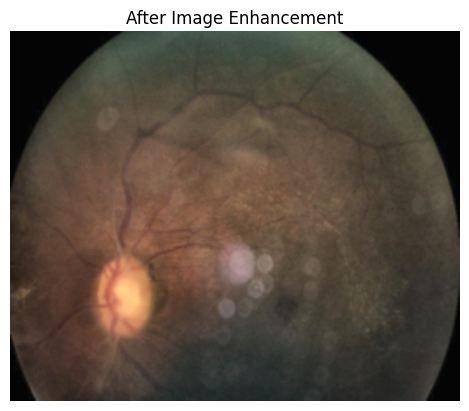

Processed and saved: 1291_left.jpg in glaucoma


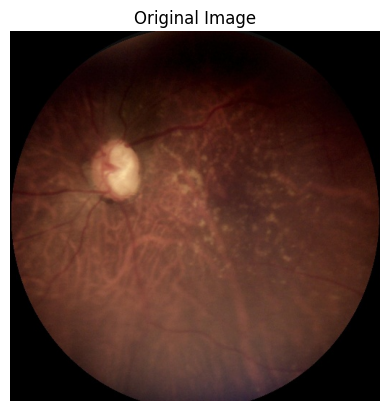

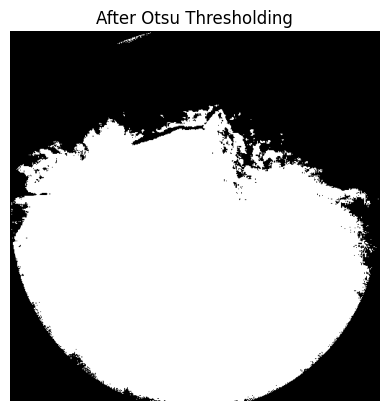

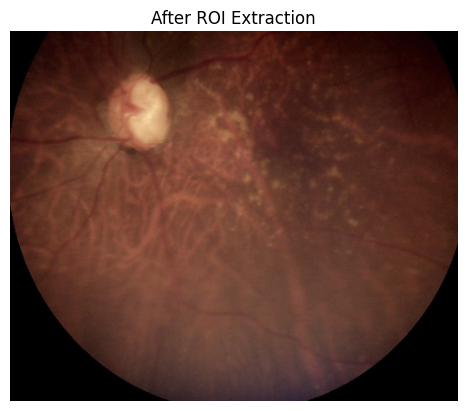

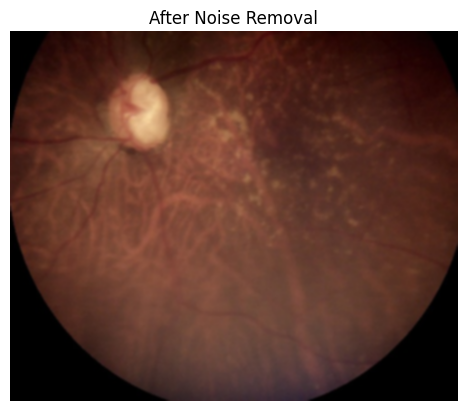

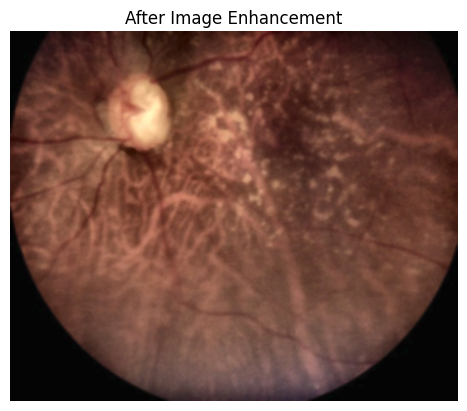

Processed and saved: 1280_left.jpg in glaucoma


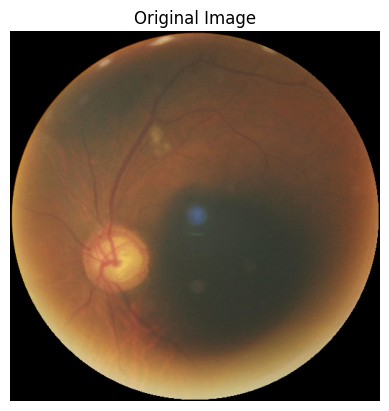

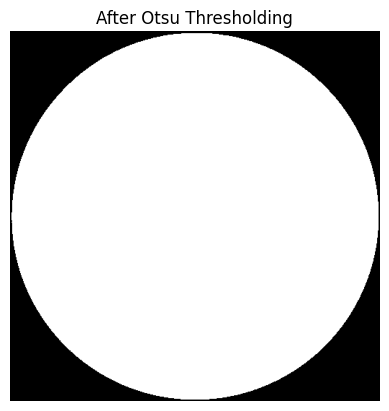

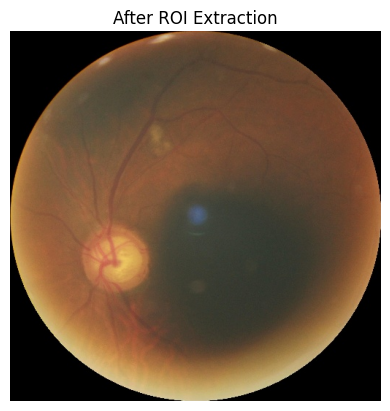

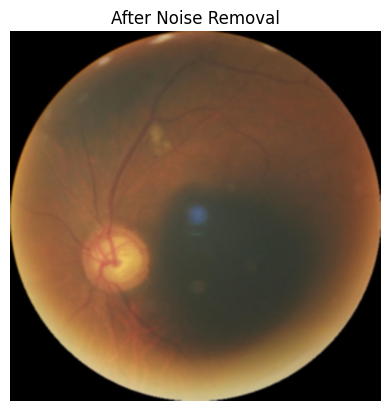

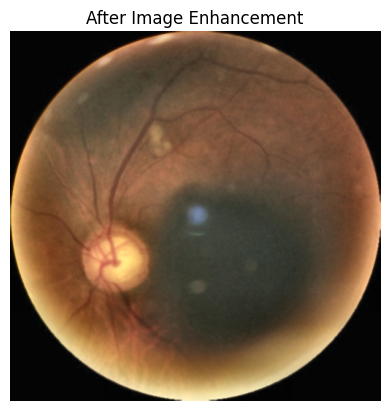

Processed and saved: 1239_left.jpg in glaucoma


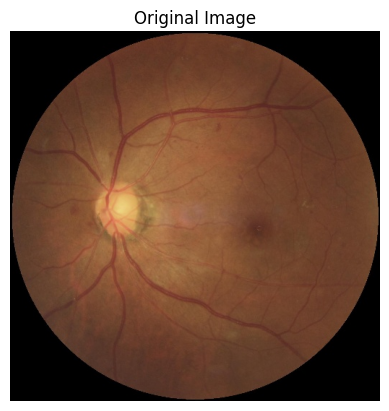

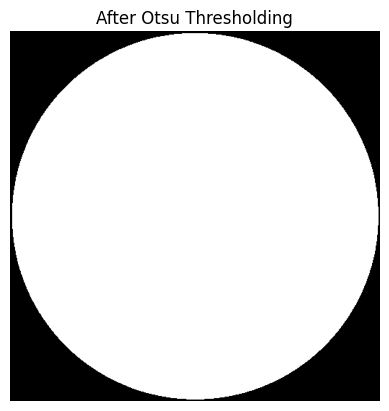

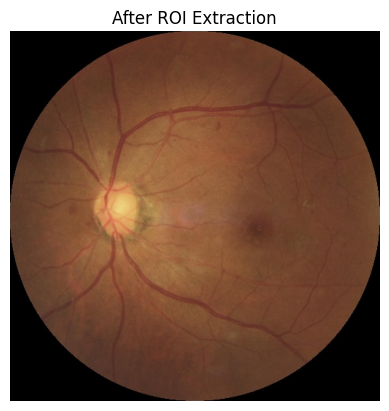

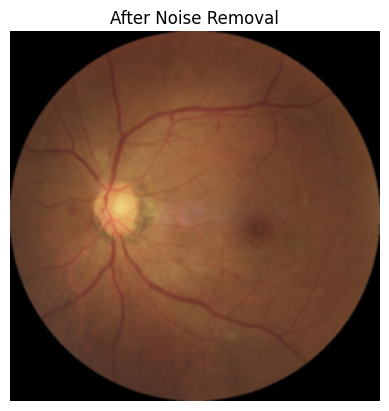

KeyboardInterrupt: ignored

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path, display_steps=False):
    # Load the original image
    image = cv2.imread(image_path)
    if display_steps:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show()

    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Block B: Artifacts removal
    # i. Otsu Thresholding
    _, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if display_steps:
        plt.imshow(thresh, cmap='gray')
        plt.title("After Otsu Thresholding")
        plt.axis('off')
        plt.show()

    # ii. Contours Detection
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # iii. ROI Extraction
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    roi = image[y:y+h, x:x+w]
    if display_steps:
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title("After ROI Extraction")
        plt.axis('off')
        plt.show()

    # Block C: Noise removal (Gaussian Blurring)
    roi_blur = cv2.GaussianBlur(roi, (5, 5), 0)
    if display_steps:
        plt.imshow(cv2.cvtColor(roi_blur, cv2.COLOR_BGR2RGB))
        plt.title("After Noise Removal")
        plt.axis('off')
        plt.show()

    # Block D: Image enhancement (CLAHE in the Y channel)
    roi_lab = cv2.cvtColor(roi_blur, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(roi_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    final_lab = cv2.merge((l_clahe, a, b))
    final_image = cv2.cvtColor(final_lab, cv2.COLOR_LAB2BGR)
    if display_steps:
        plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
        plt.title("After Image Enhancement")
        plt.axis('off')
        plt.show()

    return final_image

def process_folder(input_folder, output_folder, display_steps=False):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subdir in os.listdir(input_folder):
        subdir_path = os.path.join(input_folder, subdir)
        if os.path.isdir(subdir_path):
            output_subdir = os.path.join(output_folder, subdir)
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            for filename in os.listdir(subdir_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    input_path = os.path.join(subdir_path, filename)
                    output_path = os.path.join(output_subdir, filename)

                    processed_image = preprocess_image(input_path, display_steps)
                    cv2.imwrite(output_path, processed_image)
                    print(f"Processed and saved: {filename} in {subdir}")

# Example usage
base_folder = input("Please enter the base folder path of your dataset: ")
output_base_folder = input("Please enter the base path to save the preprocessed data: ")
display_steps = input("Do you want to display preprocessing steps for each image? (yes/no): ").lower() == 'yes'

for folder in ["train", "test", "val"]:
    input_folder = os.path.join(base_folder, folder)
    output_folder = os.path.join(output_base_folder, folder)
    process_folder(input_folder, output_folder, display_steps)


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path, display_steps=False):
    # Load the original image
    image = cv2.imread(image_path)

    fig, axs = plt.subplots(1, 7, figsize=(20, 5))  # Create a new figure with 7 subplots in a single row

    if display_steps:
        axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[0].set_title("Original Image")
        axs[0].axis('off')

    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Block B: Artifacts removal
    # i. Otsu Thresholding
    _, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if display_steps:
        axs[1].imshow(thresh, cmap='gray')
        axs[1].set_title("After Otsu Thresholding")
        axs[1].axis('off')

    # ii. Contours Detection
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # iii. ROI Extraction
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    roi = image[y:y+h, x:x+w]
    if display_steps:
        axs[2].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        axs[2].set_title("After ROI Extraction")
        axs[2].axis('off')

    # Block C: Noise removal (Gaussian Blurring)
    roi_blur = cv2.GaussianBlur(roi, (5, 5), 0)
    if display_steps:
        axs[3].imshow(cv2.cvtColor(roi_blur, cv2.COLOR_BGR2RGB))
        axs[3].set_title("After Noise Removal")
        axs[3].axis('off')

    # Block D: Image enhancement (CLAHE in the Y channel)
    roi_lab = cv2.cvtColor(roi_blur, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(roi_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    final_lab = cv2.merge((l_clahe, a, b))
    final_image = cv2.cvtColor(final_lab, cv2.COLOR_LAB2BGR)
    if display_steps:
        axs[4].imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
        axs[4].set_title("After Image Enhancement")
        axs[4].axis('off')

    # Save the final image to the output path
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, final_image)
    print(f"Processed and saved: {filename}")

    if display_steps:
        axs[5].imshow(cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB))
        axs[5].set_title("Saved Image")
        axs[5].axis('off')

    plt.show()  # Show all subplots

    return final_image

# ... rest of your code ...
base_folder = input("Please enter the base folder path of your dataset: ")
output_base_folder = input("Please enter the base path to save the preprocessed data: ")
display_steps = input("Do you want to display preprocessing steps for each image? (yes/no): ").lower() == 'yes'

for folder in ["train", "test", "val"]:
    input_folder = os.path.join(base_folder, folder)
    output_folder = os.path.join(output_base_folder, folder)
    process_folder(input_folder, output_folder, display_steps)



Please enter the base folder path of your dataset: /content/drive/MyDrive/My Paper - Abdur Rakib 201-15-3651/Final EYE Disease Dataset 5 Classes
Please enter the base path to save the preprocessed data: /content/drive/MyDrive/My Paper - Abdur Rakib 201-15-3651/demo-pic-test
Do you want to display preprocessing steps for each image? (yes/no): yes


NameError: ignored

Please enter the base folder path of your dataset: /content/drive/MyDrive/My Paper - Abdur Rakib 201-15-3651/Final EYE Disease Dataset 5 Classes
Please enter the base path to save the preprocessed data: /content/drive/MyDrive/My Paper - Abdur Rakib 201-15-3651/demo-pic-test
Do you want to display preprocessing steps for each image? (yes/no): yes
Processed and saved: 1291_left.jpg in glaucoma


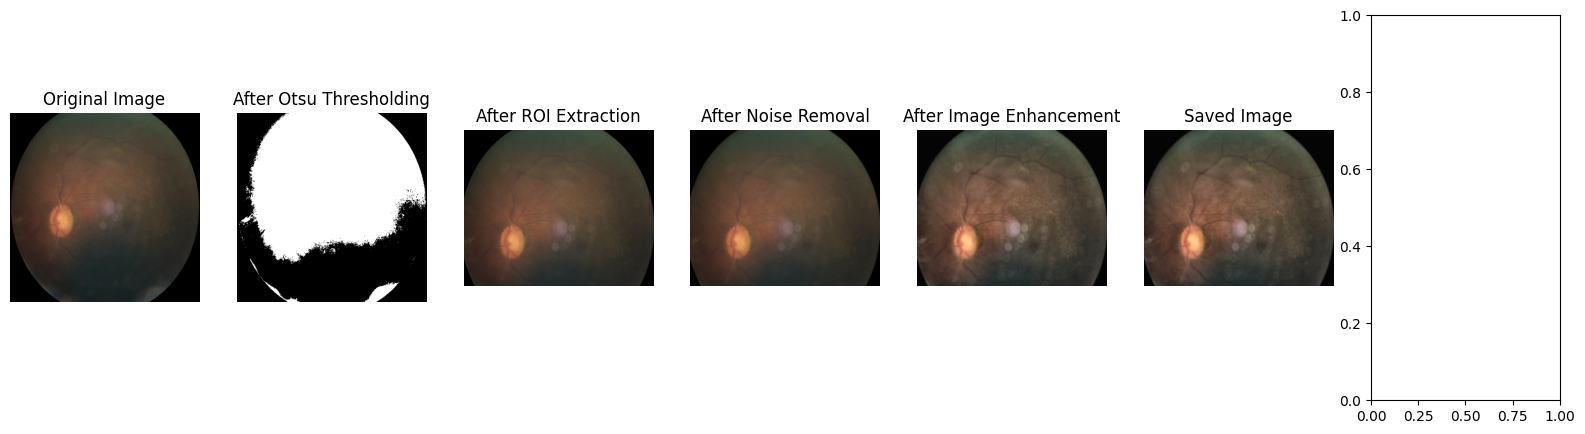

Processed and saved: 1280_left.jpg in glaucoma


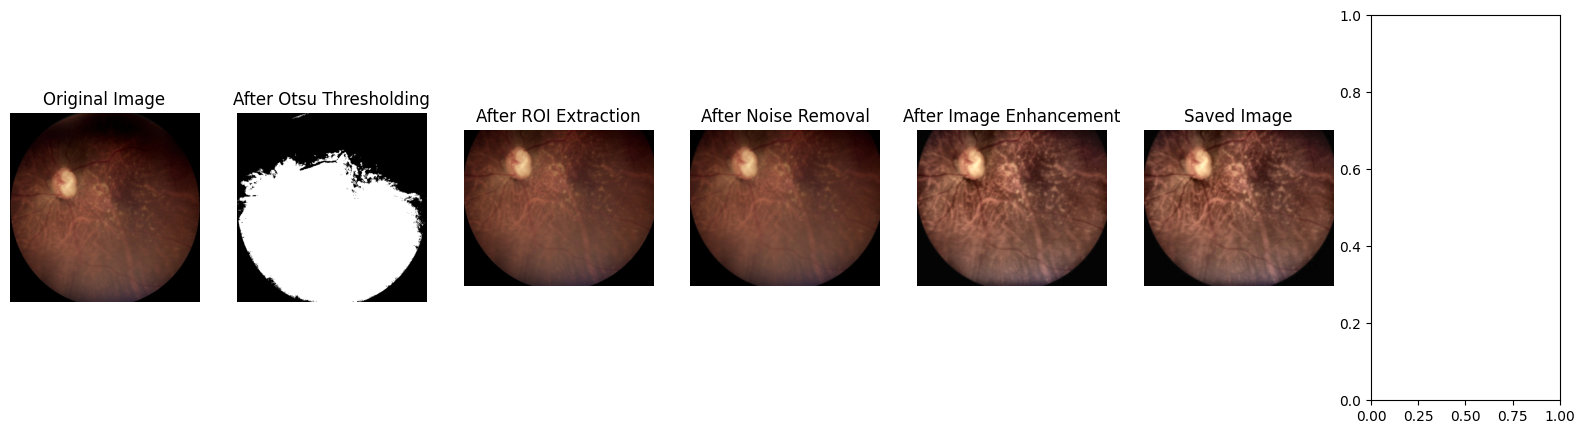

Processed and saved: 1239_left.jpg in glaucoma


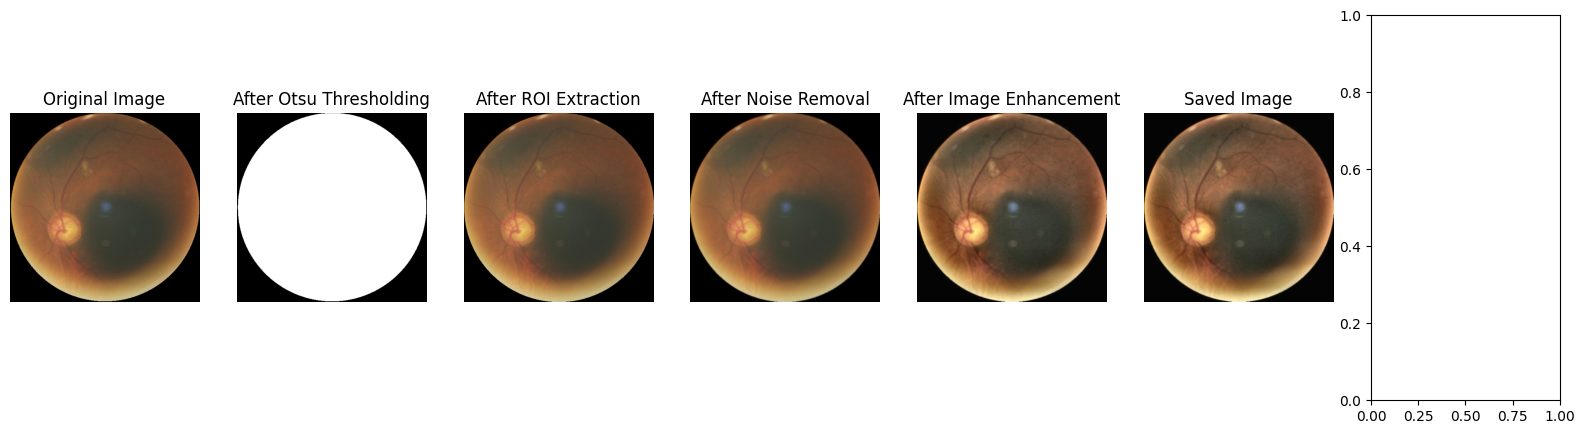

Processed and saved: 1230_left.jpg in glaucoma


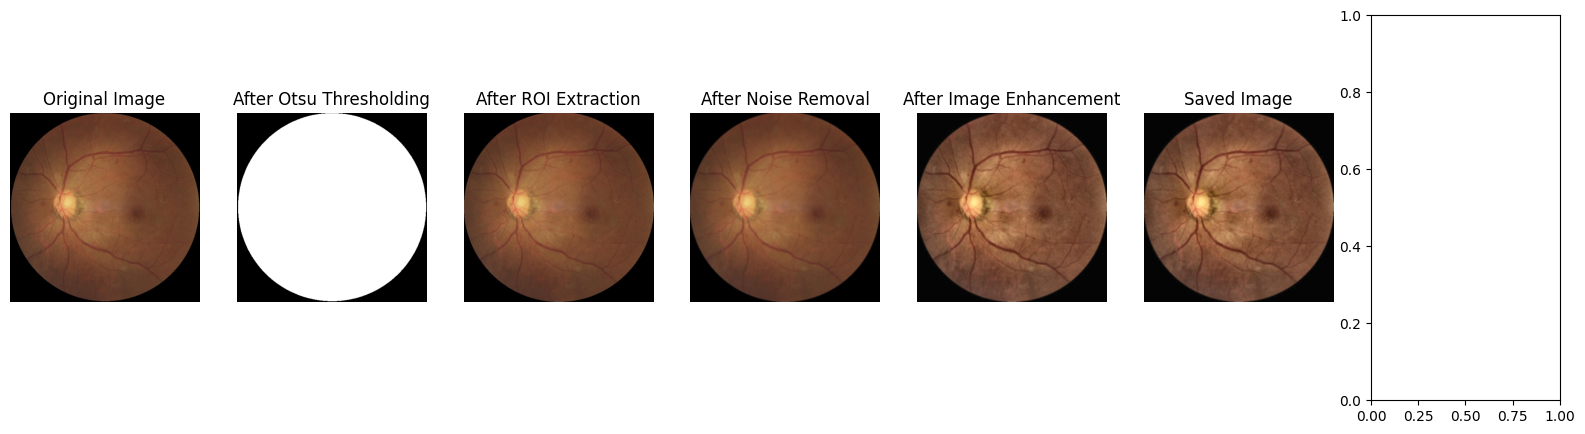

Processed and saved: 1309_right.jpg in glaucoma


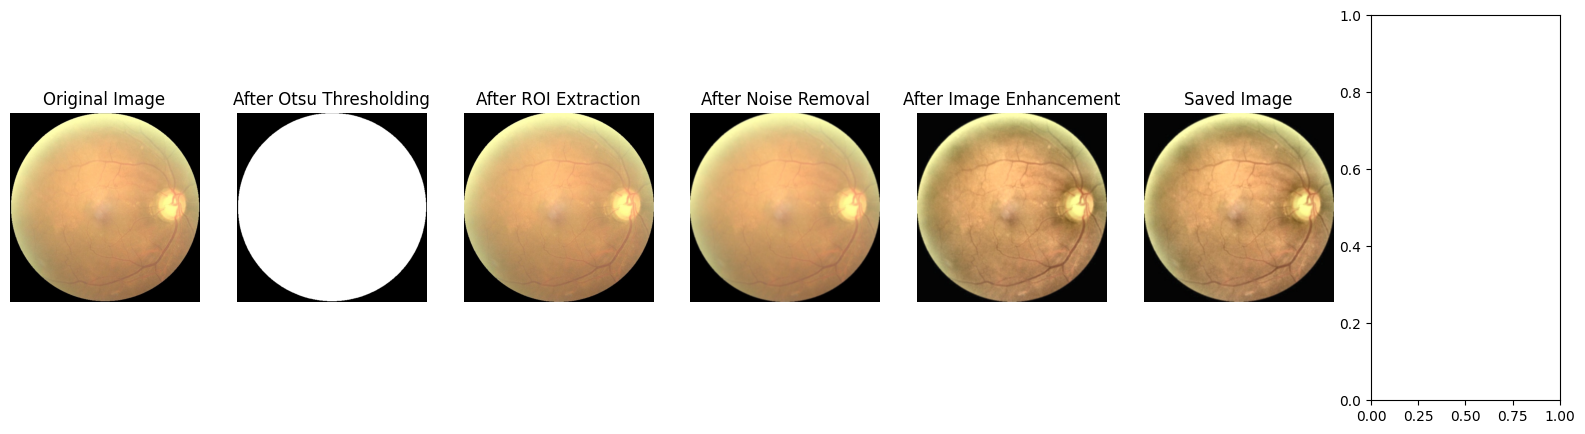

Processed and saved: 1345_left.jpg in glaucoma


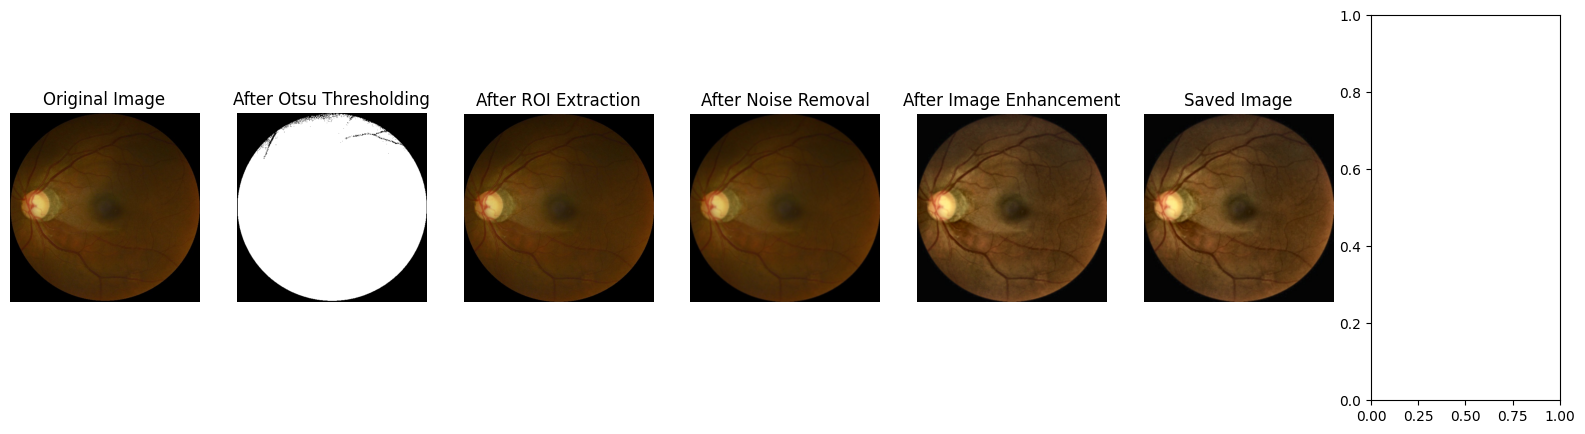

Processed and saved: 1212_right.jpg in glaucoma


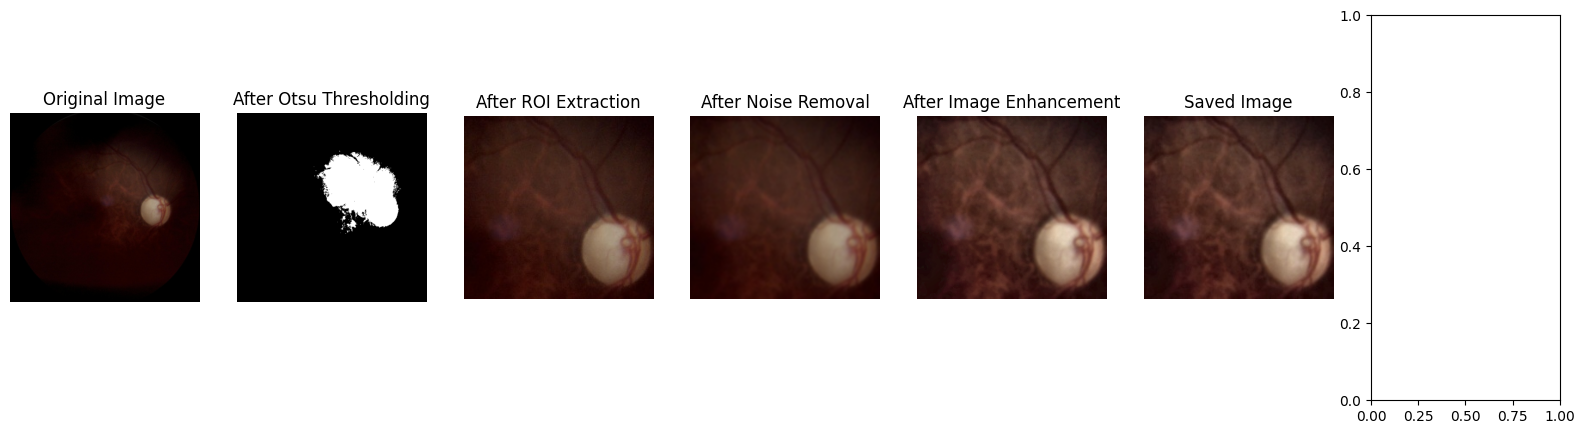

Processed and saved: 1241_left.jpg in glaucoma


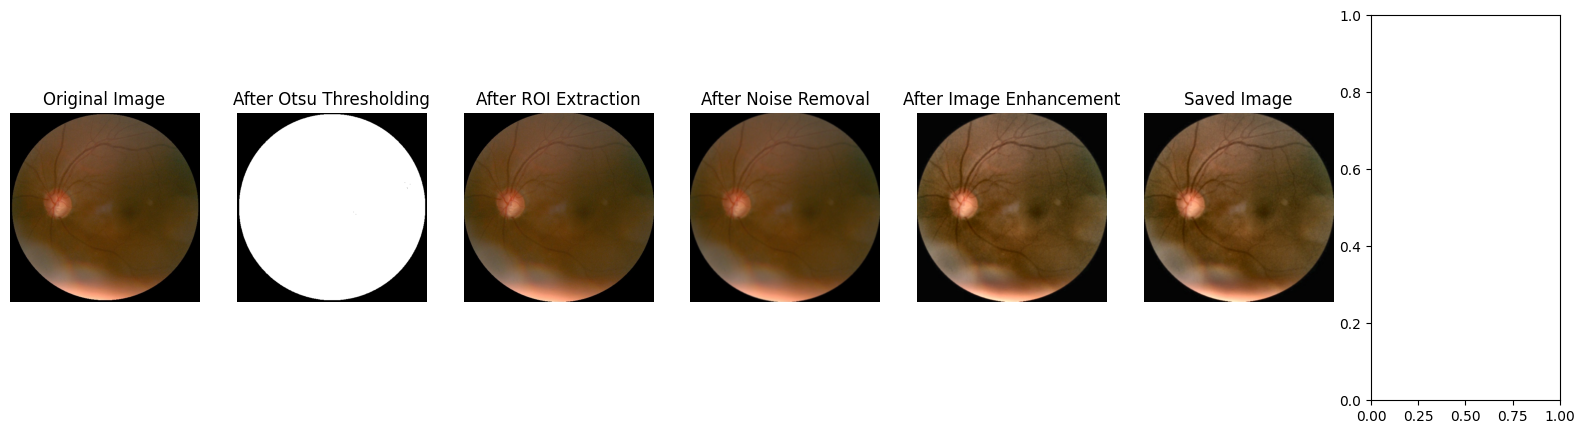

Processed and saved: 1231_left.jpg in glaucoma


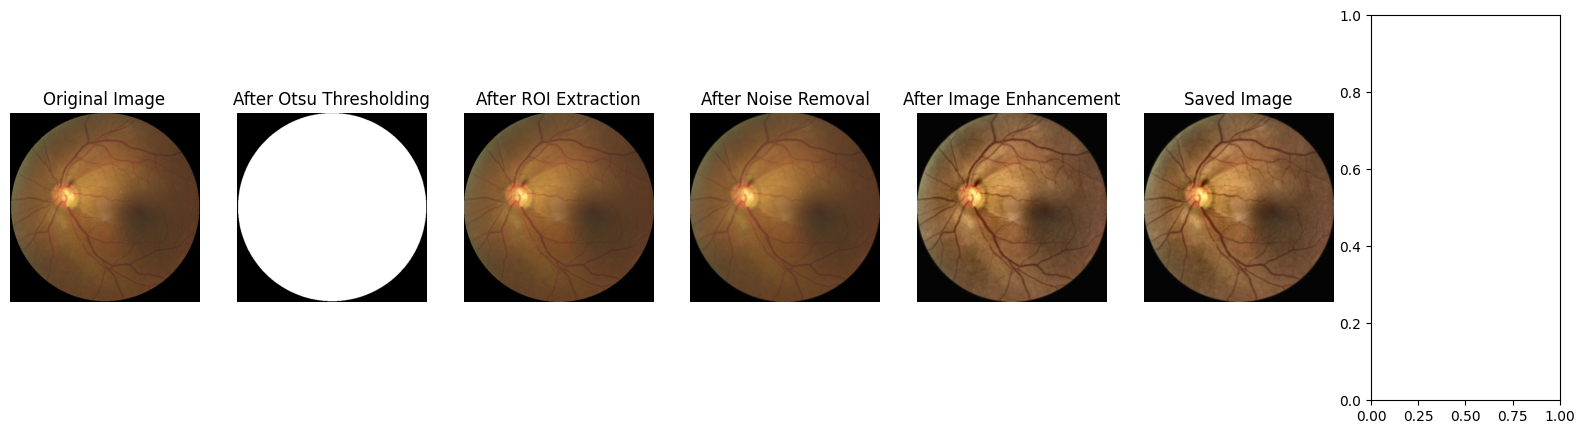

Processed and saved: 1230_right.jpg in glaucoma


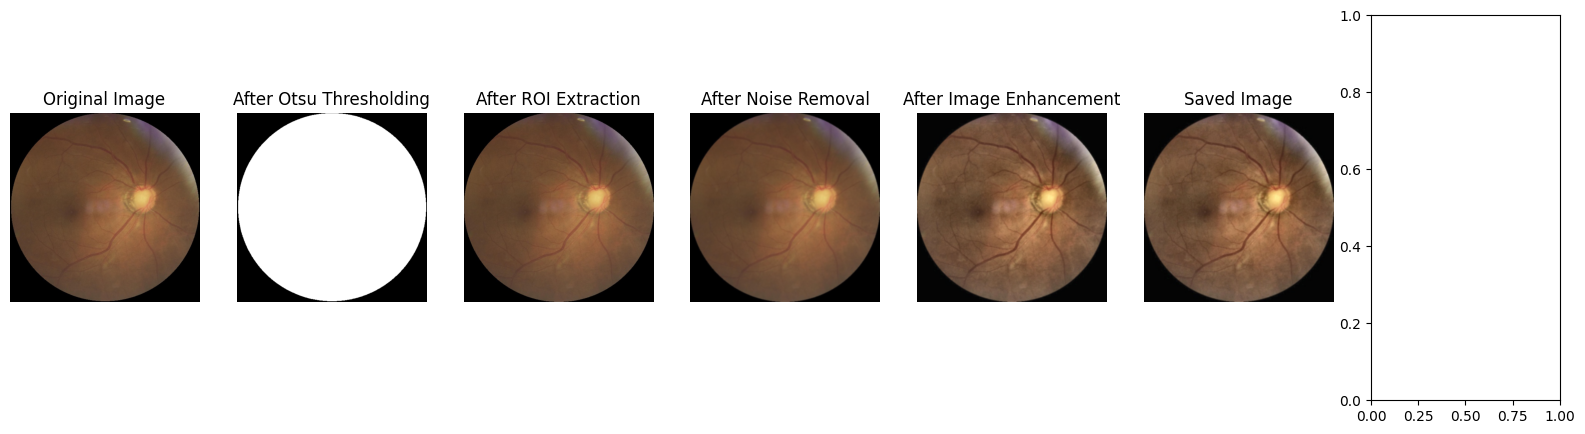

Processed and saved: 1288_right.jpg in glaucoma


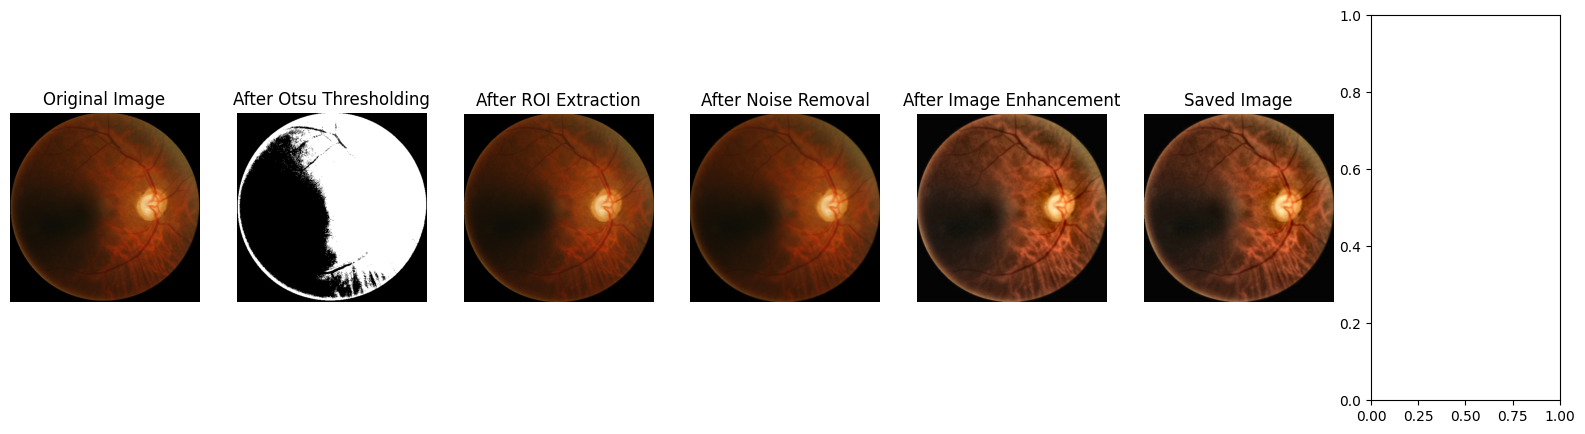

Processed and saved: 1272_right.jpg in glaucoma


KeyboardInterrupt: ignored

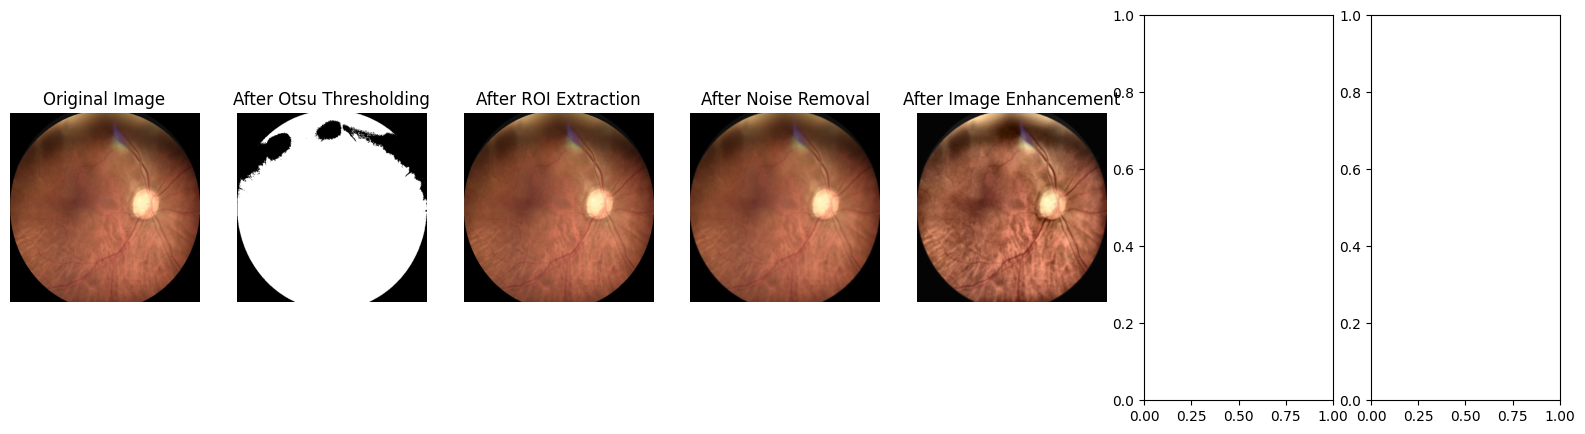

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path, display_steps=False):
    # Load the original image
    image = cv2.imread(image_path)

    fig, axs = plt.subplots(1, 7, figsize=(20, 5))  # Create a new figure with 7 subplots in a single row

    if display_steps:
        axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[0].set_title("Original Image")
        axs[0].axis('off')

    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Block B: Artifacts removal
    # i. Otsu Thresholding
    _, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if display_steps:
        axs[1].imshow(thresh, cmap='gray')
        axs[1].set_title("After Otsu Thresholding")
        axs[1].axis('off')

    # ii. Contours Detection
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # iii. ROI Extraction
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    roi = image[y:y+h, x:x+w]
    if display_steps:
        axs[2].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        axs[2].set_title("After ROI Extraction")
        axs[2].axis('off')

    # Block C: Noise removal (Gaussian Blurring)
    roi_blur = cv2.GaussianBlur(roi, (5, 5), 0)
    if display_steps:
        axs[3].imshow(cv2.cvtColor(roi_blur, cv2.COLOR_BGR2RGB))
        axs[3].set_title("After Noise Removal")
        axs[3].axis('off')

    # Block D: Image enhancement (CLAHE in the Y channel)
    roi_lab = cv2.cvtColor(roi_blur, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(roi_lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    final_lab = cv2.merge((l_clahe, a, b))
    final_image = cv2.cvtColor(final_lab, cv2.COLOR_LAB2BGR)
    if display_steps:
        axs[4].imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
        axs[4].set_title("After Image Enhancement")
        axs[4].axis('off')

    return final_image, axs  # Return the final image and the axs array for further use

def process_folder(input_folder, output_folder, display_steps=False):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subdir, _, files in os.walk(input_folder):
        output_subdir = os.path.join(output_folder, os.path.relpath(subdir, input_folder))
        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)

        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_path = os.path.join(subdir, filename)
                output_path = os.path.join(output_subdir, filename)

                processed_image, axs = preprocess_image(input_path, display_steps)  # Get axs from preprocess_image
                cv2.imwrite(output_path, processed_image)
                print(f"Processed and saved: {filename} in {os.path.relpath(subdir, input_folder)}")

                if display_steps:
                    axs[5].imshow(cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB))
                    axs[5].set_title("Saved Image")
                    axs[5].axis('off')
                    plt.show()  # Show all subplots

# Example usage
base_folder = input("Please enter the base folder path of your dataset: ")
output_base_folder = input("Please enter the base path to save the preprocessed data: ")
display_steps = input("Do you want to display preprocessing steps for each image? (yes/no): ").lower() == 'yes'

for folder in ["train", "test", "val"]:
    input_folder = os.path.join(base_folder, folder)
    output_folder = os.path.join(output_base_folder, folder)
    process_folder(input_folder, output_folder, display_steps)
